In [9]:
failed_chat_ids = [
    "t1256-4b148f70-a517-4a5c-b824-fcd4ff60c24a",
    "t1249-f1c9c9f9-2866-4b1b-bc2d-93365ea30e27",
    "t1246-d3d42e1c-e99c-4dee-b175-8115852a3293",
    "t1420-2a34ed02-bedd-47c1-af80-6e96148899f0",
    "t1182-3a7da199-4557-435d-9ca0-16ff81ff8149",
    "t1269-98d1416f-b80e-4215-906f-95063f2a81c1",
    "t1406-fb35c1b5-7df6-41f6-a2e7-d36bf534d703",
    "t1272-0cc7c818-2415-4002-902b-38a56123cab9",
    "t1266-12fae68e-3cbe-466f-918e-30cbdf8781df",
    "t1259-dbb106ad-ec5d-4520-85de-9c8e3b9bc96a",
    "t1276-aebf7cc2-0cda-43d9-a995-aa290d1eacca",
    "t1262-8b7ecbf4-a531-4b64-91cb-b55b606532ef",
]

In [10]:
len(failed_chat_ids)

12

In [11]:
import requests
import json
import ast
def get_chat_log(x):
    url = "https://behnam-torob-ai-shopping-assistant.darkube.app/chat"
    messages = [{"type": "text", "content":  x}]
    data = {
            "chat_id": "check_chat_log",
            "messages": messages,
        }

        # Disable system proxy
    resp = requests.post(url, json=data, proxies={"http": None, "https": None})
    return resp

In [12]:
import ast
import datetime
from typing import Any
import re

import ast
import re

def clean_problematic_calls(s: str) -> str:
    """
    Replace problematic function calls (like datetime.datetime(...)) with safe strings
    before passing to literal_eval.
    """
    if not s:
        return s
    # Replace datetime.datetime(YYYY, MM, DD, hh, mm, ss) → "YYYY-MM-DD-hh-mm-ss"
    s = re.sub(
        r"datetime\.datetime\(([^)]+)\)",
        lambda m: "'" + m.group(1).replace(", ", "-") + "'",
        s
    )
    return s


def safe_str_to_list(s: str) -> list[str]:
    """
    Convert a string representation of a list into a list of strings safely.
    """
    if not s:
        return []
    s = clean_problematic_calls(s)
    try:
        result = ast.literal_eval(s)
        if isinstance(result, list):
            return [str(item) for item in result]
    except Exception as e:
        print("Failed to parse list string:", e)
    return []

def safe_str_to_dict(s: str) -> dict:
    """
    Convert a string representation of a Python dict into an actual dict,
    handling datetime and 'null' strings safely.
    """
    if not s:
        return {}
    s = s.replace("'null'", "None")
    s = re.sub(
        r"datetime\.datetime\(([^)]+)\)",
        lambda m: f"'{m.group(1).replace(', ', '-')}'",
        s
    )
    
    try:
        result = ast.literal_eval(s)
        if isinstance(result, dict):
            return result
    except Exception as e:
        print("Failed to parse string:", e)
    
    return {}

def parse_chat_log(raw: str) -> list[dict]:
    """
    Convert a raw string (list of dict-strings) into a list of dicts.
    """
    list_strs = safe_str_to_list(raw)
    return [safe_str_to_dict(item) for item in list_strs]

In [13]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import base64
def visualize_iamge(image_b64):
    if image_b64.startswith("data:"):
        image_b64 = image_b64.split(",")[1]
    image_bytes = base64.b64decode(image_b64)
    image = Image.open(BytesIO(image_bytes))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

In [14]:
def request_chat(x, image_url=None, chat_id = 'mytest'):

    url = "https://behnam-torob-ai-shopping-assistant.darkube.app/chat"
    messages = [{"type": "text", "content":  x}]
    if image_url:
        messages.append({"type": "image", "content": image_url})
    data = {
        "chat_id": chat_id,
        "messages": messages,
    }

    # Disable system proxy
    resp = requests.post(url, json=data, proxies={"http": None, "https": None})
    return resp.json()

In [15]:
from tqdm import tqdm
failed_dicts = []
for x in tqdm(sorted(failed_chat_ids, reverse=True)):
    chat_log = get_chat_log(x)
    chat_log_str = chat_log.json()['message']  # raw string
    chat_log_dicts = parse_chat_log(chat_log_str)
    failed_dicts.append(chat_log_dicts)

  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:09<00:00,  1.30it/s]


--- Chat #1 ---
 Turn 1:
   chat_id: t1420-2a34ed02-bedd-47c1-af80-6e96148899f0
   base_id: Al2uXLsvolRJ4TQ19m3D66XlbXoIfHRg
   user_text: لطفاً یک محصول مرتبط با تصویر را به من معرفی کنید.
   chat_index: 1
   model_text: صندلی مدرن با دسته‌های منحنی
   base_random_keys: ["kkovqv"]
   member_random_keys: None
   finished: True
   timestamp: 2025-9-26-13-37-27-795762
   extra_info: None


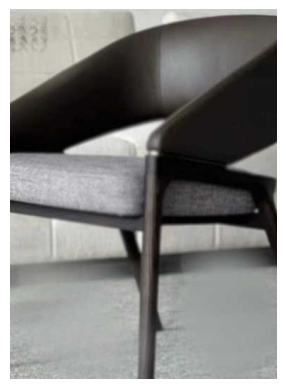

{'message': 'برای کمک به شما در پیدا کردن محصول مرتبط با تصویر، لطفاً چند سوال دارم: آیا برند خاصی مد نظر دارید؟ آیا گارانتی برایتان مهم است؟ در کدام شهر می\u200cخواهید خرید کنید؟ حدود قیمت مورد نظر شما چقدر است؟ و آیا ویژگی خاصی مثل اندازه، رنگ یا جنس برایتان اهمیت دارد؟ همچنین لطفاً نام دقیق محصول مورد نظر خود را بفرمایید یا توضیح دهید که چه محصولی مد نظر دارید؟', 'base_random_keys': None, 'member_random_keys': None}


--- Chat #2 ---
 Turn 1:
   chat_id: t1406-fb35c1b5-7df6-41f6-a2e7-d36bf534d703
   base_id: t0iENAyQLJrFsDVBYoab4g6VcmEf7dmn
   user_text: لطفاً یک محصول مرتبط با تصویر به من بدهید.
   chat_index: 1
   model_text: توالت فرنگی
   base_random_keys: ["jckmsg"]
   member_random_keys: None
   finished: True
   timestamp: 2025-9-26-13-44-19-74562
   extra_info: None


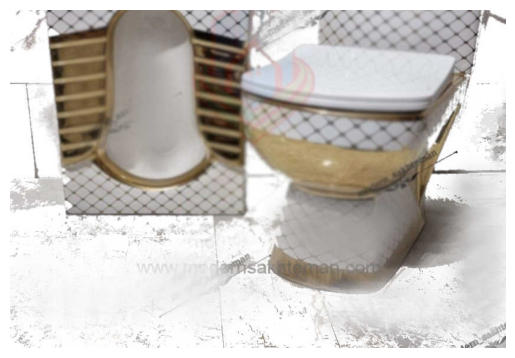

{'message': 'لطفاً تصویر یا توضیح بیشتری درباره محصول مورد نظر ارائه دهید تا بتوانم محصول مرتبط را برای شما پیدا کنم.', 'base_random_keys': None, 'member_random_keys': None}


--- Chat #3 ---
 Turn 1:
   chat_id: t1276-aebf7cc2-0cda-43d9-a995-aa290d1eacca
   base_id: KJ78HTnUe0w4JFHzOyPzjL6EVPFXZoUd
   user_text: سلام! من دنبال یه کاسه بزرگ برای استفاده در مهمونی‌ها هستم. می‌خوام که جنسش استیل باشه و رنگ طلایی داشته باشه. قیمتش هم حدود 500,000 تا 700,000 تومان باشه. می‌تونید کمکم کنید؟
   chat_index: 1
   model_text: برای کمک به شما در پیدا کردن کاسه بزرگ استیل طلایی مناسب، لطفاً چند سوال دارم: آیا برند خاصی مد نظر دارید؟ آیا گارانتی برایتان مهم است؟ در کدام شهر می‌خواهید خرید کنید؟ حدود قیمت مورد نظر شما را گفتید 500,000 تا 700,000 تومان، درست است؟ و آیا ویژگی خاص دیگری مثل اندازه دقیق یا طرح خاص برایتان اهمیت دارد؟

همچنین، اسم دقیق محصول مورد نظر شما چیست؟ آیا چیزی در ذهن دارید؟
   base_random_keys: None
   member_random_keys: None
   finished: False
   timestamp: 2025-9-26-13-51-7-

In [ ]:
image_keys = ['user_image_url', 'model_image_url']
import random
import time

for i, chat_dict_list in enumerate(failed_dicts, 1):
    print(f"--- Chat #{i} ---")
    chat_id = f"chat_testv{int(random.random() * 10000)}"
    # Each chat is now a list of dicts (chat turns)
    for turn_idx, chat_dict in enumerate(chat_dict_list, 1):
        print(f" Turn {turn_idx}:")
        for key, value in chat_dict.items():
            if key not in image_keys:
                print(f"   {key}: {value}")
        
        # Show the image if available (byte content)
        text_input = chat_dict.get("user_text", "")
        if chat_dict.get("user_image_url"):
            try:
                img_bytes = chat_dict["user_image_url"]  # should be bytes
                # Example usage if you want to test sending it:

                visualize_iamge(img_bytes)  # <- fixed typo
            except Exception as e:
                print(f"   Failed to load image: {e}")
        start = time.time()
        resp = request_chat(text_input, chat_id = chat_id)
        end = time.time()
        elapsed = end - start
        print(resp)
        print(f"Elapsed time: {elapsed:.4f} seconds")
    print("\n")
